In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
model = keras.models.load_model("model.h5")

In [4]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 100)               204900    
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                           

In [6]:
tf.__version__

'2.7.0'

In [10]:
!wget https://raw.githubusercontent.com/alexeygrigorev/clothing-dataset-small/master/train/pants/14bc842c-60e9-468c-ab35-5089143945f5.jpg -O pants.jpg

--2021-11-26 18:34:36--  https://raw.githubusercontent.com/alexeygrigorev/clothing-dataset-small/master/train/pants/14bc842c-60e9-468c-ab35-5089143945f5.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26557 (26K) [image/jpeg]
Saving to: ‘pants.jpg’

pants.jpg           100%[===================>]  25.93K  --.-KB/s    in 0.009s  

2021-11-26 18:34:36 (2.92 MB/s) - ‘pants.jpg’ saved [26557/26557]



In [14]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [15]:
img = load_img("pants.jpg", target_size = (299, 299))

In [17]:
import numpy as np

In [19]:
x = np.array(img)

X = np.array([x])

X = preprocess_input(X)

In [21]:
preds = model.predict(X)

In [22]:
preds

array([[-1.8651277, -2.9178913, -1.2103153, -1.0676954,  7.727895 ,
        -2.0198653, -3.263851 ,  2.8925793, -3.1616006, -3.1563346]],
      dtype=float32)

In [23]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [24]:
dict(zip(classes, preds[0]))

{'dress': -1.8651277,
 'hat': -2.9178913,
 'longsleeve': -1.2103153,
 'outwear': -1.0676954,
 'pants': 7.727895,
 'shirt': -2.0198653,
 'shoes': -3.263851,
 'shorts': 2.8925793,
 'skirt': -3.1616006,
 't-shirt': -3.1563346}

# Convert Keras to TF-Lite

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpjn1dycl3/assets


In [31]:
!ls 

model.h5  model.tflite	notebook.ipynb	pants.jpg


In [32]:
import tensorflow.lite as tflite

In [33]:
interpreter = tflite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

In [35]:
input_index = interpreter.get_input_details()[0]["index"]

In [37]:
output_index = interpreter.get_output_details()[0]["index"]

In [40]:
interpreter.set_tensor(input_index, X)

In [41]:
interpreter.invoke()

In [43]:
preds = interpreter.get_tensor(output_index)

In [44]:
dict(zip(classes, preds[0]))

{'dress': -1.8651277,
 'hat': -2.9178922,
 'longsleeve': -1.2103156,
 'outwear': -1.0676945,
 'pants': 7.727894,
 'shirt': -2.0198653,
 'shoes': -3.2638514,
 'shorts': 2.8925805,
 'skirt': -3.1616,
 't-shirt': -3.156337}

# Removing TF dependency

In [45]:
from PIL import Image

In [48]:
with Image.open("pants.jpg") as img:
    img = img.resize((299, 299), Image.NEAREST)

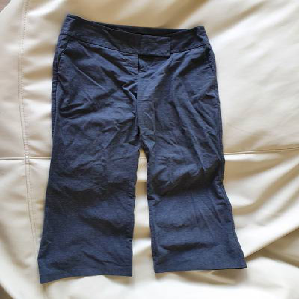

In [57]:
img

In [58]:
def preprocess_input(x):
    x /= 127.5
    x  -= 1.
    return x

In [59]:
x = np.array(img, dtype="float32")
X = np.array([x])

X = preprocess_input(X)

In [60]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [61]:
dict(zip(classes, preds[0]))

{'dress': -1.8651277,
 'hat': -2.9178922,
 'longsleeve': -1.2103156,
 'outwear': -1.0676945,
 'pants': 7.727894,
 'shirt': -2.0198653,
 'shoes': -3.2638514,
 'shorts': 2.8925805,
 'skirt': -3.1616,
 't-shirt': -3.156337}

# Simpler way of doing above things

In [62]:
!pip install keras-image-helper

In [64]:
from keras_image_helper import create_preprocessor

In [66]:
preprocessor = create_preprocessor("xception", target_size = (299, 299))

url = "http://bit.ly/mlbookcamp-pants"
X = preprocessor.from_url(url)

In [68]:
X[:5]

array([[[[-0.11372548, -0.15294117, -0.19999999],
         [-0.11372548, -0.15294117, -0.19999999],
         [-0.10588235, -0.14509803, -0.19215685],
         ...,
         [-0.01960784, -0.01960784, -0.08235294],
         [-0.04313725, -0.04313725, -0.10588235],
         [-0.11372548, -0.11372548, -0.17647058]],

        [[-0.09019607, -0.12941176, -0.17647058],
         [-0.09019607, -0.12941176, -0.17647058],
         [-0.08235294, -0.12156862, -0.16862744],
         ...,
         [-0.01960784, -0.01960784, -0.08235294],
         [-0.04313725, -0.04313725, -0.10588235],
         [-0.10588235, -0.10588235, -0.16862744]],

        [[-0.09803921, -0.1372549 , -0.18431371],
         [-0.09803921, -0.1372549 , -0.18431371],
         [-0.09019607, -0.12941176, -0.17647058],
         ...,
         [-0.01960784, -0.01960784, -0.08235294],
         [-0.03529412, -0.03529412, -0.09803921],
         [-0.09019607, -0.09019607, -0.15294117]],

        ...,

        [[-0.67058825, -0.7019608 , -0

In [69]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [70]:
dict(zip(classes, preds[0]))

{'dress': -1.8682897,
 'hat': -4.7612453,
 'longsleeve': -2.316984,
 'outwear': -1.0625705,
 'pants': 9.887156,
 'shirt': -2.8124316,
 'shoes': -3.6662838,
 'shorts': 3.2003622,
 'skirt': -2.6023388,
 't-shirt': -4.8350453}